Categorical Data Encoding

In [5]:
# 1. Label Encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [6]:
# !pip install pandas

In [7]:
# !pip install scikit-learn

In [8]:
# Sample DataFrame
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red']
})
df


Color
0    Red
1   Blue
2  Green
3   Blue
4    Red

In [9]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data
df['Color_encoded'] = label_encoder.fit_transform(df['Color'])

print(df)

   Color  Color_encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2


In [10]:
# 2. One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Color'])

print(df_encoded)

   Color_encoded  Color_Blue  Color_Green  Color_Red
0              2       False        False       True
1              0        True        False      False
2              1       False         True      False
3              0        True        False      False
4              2       False        False       True


In [11]:
# 3. Binary Encoding
import category_encoders as ce
# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=['Color'])

# Fit and transform the data
df_encoded = binary_encoder.fit_transform(df)

print(df_encoded)

   Color_0  Color_1  Color_encoded
0        0        1              2
1        1        0              0
2        1        1              1
3        1        0              0
4        0        1              2


In [15]:
# 4. Target Encoding
# Sample DataFrame
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
    'Price': [10, 15, 12, 14, 11]
})
df


Color  Price
0    Red     10
1   Blue     15
2  Green     12
3   Blue     14
4    Red     11

In [17]:
# Initialize TargetEncoder
target_encoder = ce.TargetEncoder(cols=['Color'])

# Fit and transform the data
df_encoded = target_encoder.fit_transform(df[['Color']], df['Price'])

# Add the encoded column to the original DataFrame
df['Color_encoded'] = df_encoded

print(df)


   Color  Price  Color_encoded
0    Red     10      12.130483
1   Blue     15      12.697887
2  Green     12      12.347957
3   Blue     14      12.697887
4    Red     11      12.130483


Example to detect outlier

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
df = pd.DataFrame({
    'Value': [10, 12, 13, 12, 14, 15, 16, 17, 18, 19, 20, 100]
})
df


Value
0      10
1      12
2      13
3      12
4      14
5      15
6      16
7      17
8      18
9      19
10     20
11    100

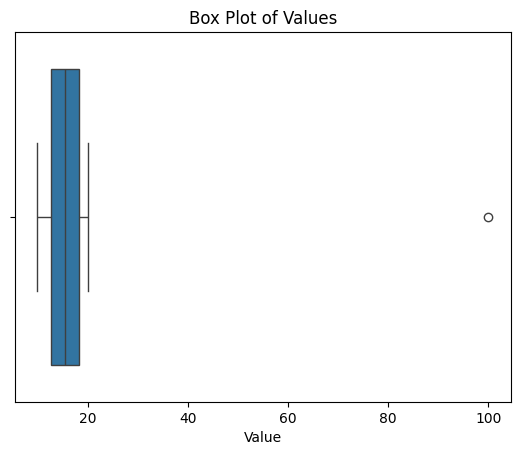

In [20]:

# Create a box plot
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Values')
plt.show()


In [24]:
# necessary imports
import category_encoders as ce
import pandas as pd

# Sample data
data = pd.DataFrame({'Country': ['USA', 'Canada', 'UK', 'USA', 'UK']})

# Initialize the binary encoder
encoder = ce.BinaryEncoder(cols=['Country'])

# Fit and transform the data
encoded_data = encoder.fit_transform(data)
encoded_data

Country_0  Country_1
0          0          1
1          1          0
2          1          1
3          0          1
4          1          1